In [67]:
using XLSX, CSV, DataFrames, Plots, Plots.Measures, StatsBase

In [98]:
df = DataFrame(XLSX.readtable("Table 1 phylloglossum manuscript.xlsx", "Sheet1"))
df.genus = first.(split.(df.Species))
df.species = last.(split.(df.Species))
df.nickname = getindex.(df.genus, 1) .* getindex.(df.species, Ref(1:2))
df.Length = Int.(df.Length)
df.Repeat = Int.(df.Repeat)
df.LSC = Int.(df.LSC)
df.SSC = Int.(df.SSC)
df.Genes = Int.(df.Genes)
df.Protein = Int.(df.Protein)
df.rRNA = Int.(df.rRNA)
df.tRNA = Int.(df.tRNA)
df.Introns = Int.(df.Introns)
df = df[4:11, :]

Row,Species,Length,Repeat,LSC,SSC,Genes,Protein,rRNA,tRNA,Introns,genus,species,nickname
,Any,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,SubStrin…,SubStrin…,String
1,Huperzia lucidula,154373,15314,104088,19657,122,87,4,31,22,Huperzia,lucidula,Hlu
2,Huperzia serrata,154176,15313,103892,19658,122,87,4,31,22,Huperzia,serrata,Hse
3,Huperzia crispata,150320,15313,104023,19671,122,87,4,31,22,Huperzia,crispata,Hcr
4,Huperzia arctica,153956,15145,103997,19669,122,87,4,31,22,Huperzia,arctica,Har
5,Phlegmariurus carinatus,150349,15156,100582,19455,122,87,4,31,22,Phlegmariurus,carinatus,Pca
6,Phlegmariurus phlegmaria,149711,15192,99862,19465,121,86,4,31,21,Phlegmariurus,phlegmaria,Pph
7,Phlegmariurus squarrosus,150398,15169,100605,19455,122,87,4,31,22,Phlegmariurus,squarrosus,Psq
8,Phylloglossum drummondii,144520,13739,97887,19155,115,81,4,30,21,Phylloglossum,drummondii,Pdr


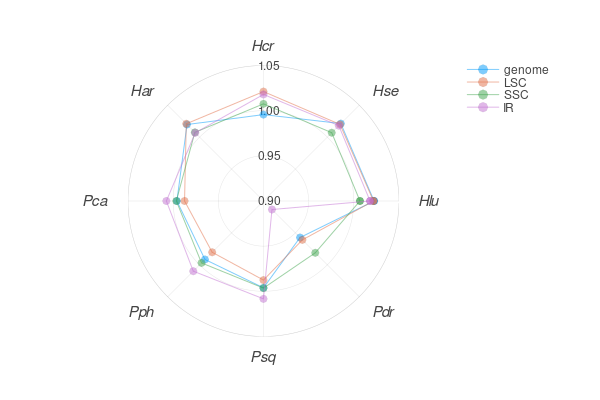

In [103]:
default(fontfamily="Helvetica", proj=:polar, ms=4, msw=0, alpha = 0.5, xaxis=false, margin=10mm, foreground_color_legend = nothing)
justifyme(θ) = (0≤θ<π/2 || 3π/2<θ≤2π) ? :left : (π/2<θ<3π/2) ? :right : :center

n = nrow(df)
θ = LinRange(0, 2pi, n+1)
z = 1.15*exp.(im*2π*(0:n-1)/n)

plot(θ, df.Length[mod1.(1:n+1, n)] ./ mean(df.Length),  label="genome")
plot!(θ, df.LSC[mod1.(1:n+1, n)] ./ mean(df.LSC), label="LSC")
plot!(θ, df.SSC[mod1.(1:n+1, n)] ./ mean(df.SSC), label="SSC")
plot!(θ, df.Repeat[mod1.(1:n+1, n)] ./ mean(df.Repeat), label="IR")
annotate!(real.(z), imag.(z), text.(df.nickname,10,justifyme.(θ[1:n]), "Helvetica Oblique"), legend=:outertopright, ylims=(0.9,1.05))

In [104]:
savefig("relative sizes Huperzioidae.svg")

"/Users/ian/Documents/projects/phylloglossum/radar/relative sizes Huperzioidae.svg"

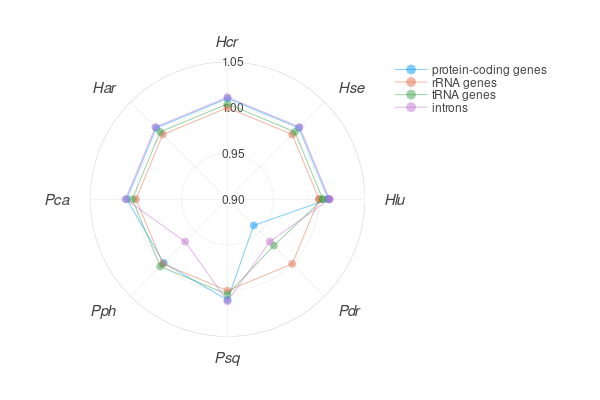

In [105]:
plot(θ, df.Protein[mod1.(1:n+1, n)] ./ mean(df.Protein), label="protein-coding genes")
plot!(θ, df.rRNA[mod1.(1:n+1, n)] ./ mean(df.rRNA), label="rRNA genes")
plot!(θ, df.tRNA[mod1.(1:n+1, n)] ./ mean(df.tRNA), label="tRNA genes")
plot!(θ, df.Introns[mod1.(1:n+1, n)] ./ mean(df.Introns), label="introns")
annotate!(real.(z), imag.(z), text.(df.nickname,10,justifyme.(θ[1:n]), "Helvetica Oblique"), legend=:outertopright, ylims=(0.9,1.05))

In [ ]:
savefig("relative counts Huperzioidae.svg")